# S5. AQI

In [1]:
import pandas as pd

df = pd.read_csv("ecodata.csv")
df.head(2)

,id,city_id,location_id,camera_id,co,no2,so2,o3,pm25,pm10,temp,hum,time,ver,lat,lon,created
0,15,2,2,420,14.6,0,0,0.52,42,45,-0.12,97.99,2022-11-26 15:18:00,-1,43.238362,76.889989,2022-11-26 09:17:33
1,15,2,2,420,14.6,0,0,0.52,42,45,-0.13,98.01,2022-11-26 15:17:58,-1,43.238362,76.889989,2022-11-26 09:17:31


In [2]:
df.drop(columns=["id", "city_id", "location_id", "camera_id", "ver", "lat", "lon", "created"], inplace=True)

df.head(2)

,co,no2,so2,o3,pm25,pm10,temp,hum,time
0,14.6,0,0,0.52,42,45,-0.12,97.99,2022-11-26 15:18:00
1,14.6,0,0,0.52,42,45,-0.13,98.01,2022-11-26 15:17:58


## AQI

**AQI** это индекс, который расчитывается как максимальное значение сабиндексов по каждому виду измерений

То есть сначала нам надо посчитать индекс каждого вида измерений, потом выбрать из него максимальное значение

Индексы каждого вида измерений считаются по собственным формулам, которые зависят от того, в каком диапазоне находится каждое значение

Диапазоны также отличаются по странам, мы будем использовать индийский стандарт - https://www.pranaair.com/blog/what-is-air-quality-index-aqi-and-its-calculation/

Обсуждение стандартов в Казахстане https://ecounion.kz/?p=6663

### Например, PM2.5

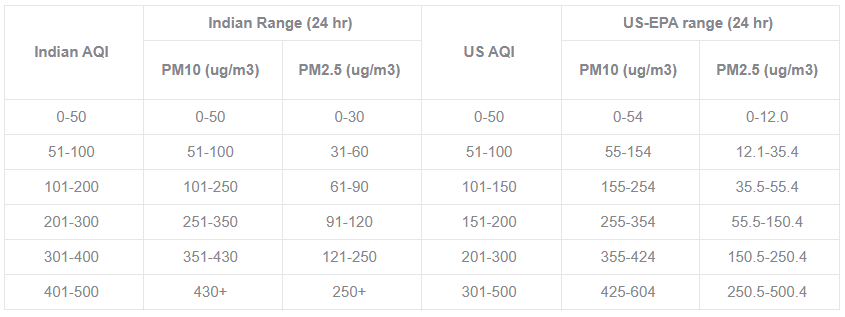

Если измерено значение x, то индекс будет равен:

* x <= 30: subindex = x * 50 / 30
* 31 <= x <= 60: subindex = 50 + (x - 30) * 50 / 30
* x <= 90: subindex = 100 + (x - 60) * 100 / 30
* x <= 120: subindex = 200 + (x - 90) * 100 / 30
* x <= 250: subindex = 300 + (x - 120) * 100 / 130
* x > 250: subindex = 400 + (x - 250) * 100 / 130

In [3]:
def pm25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0
    
df["pm25_subindex"] = df["pm25"].map(pm25_subindex)

df.loc[::19].head(5)

,co,no2,so2,o3,pm25,pm10,temp,hum,time,pm25_subindex
0,14.60,0,0,0.52,42,45,-0.12,97.99,2022-11-26 15:18:00,70.000000
19,14.50,0,0,0.49,37,38,-0.03,98.12,2022-11-26 15:17:22,61.666667
38,14.39,0,0,0.48,39,46,-0.07,98.14,2022-11-26 15:16:42,65.000000
57,14.89,0,0,0.50,39,46,-0.19,97.98,2022-11-26 15:16:04,65.000000
76,15.60,0,0,0.58,22,27,-0.26,97.70,2022-11-26 15:15:24,36.666667


### Произведите расчет сабиндексов PM10, CO, O3, NO2, SO2

назовите новые колонки 
* pm10_subindex
* co_subindex
* o3_subindex
* no2_subindex
* so2_subindex

### PM10

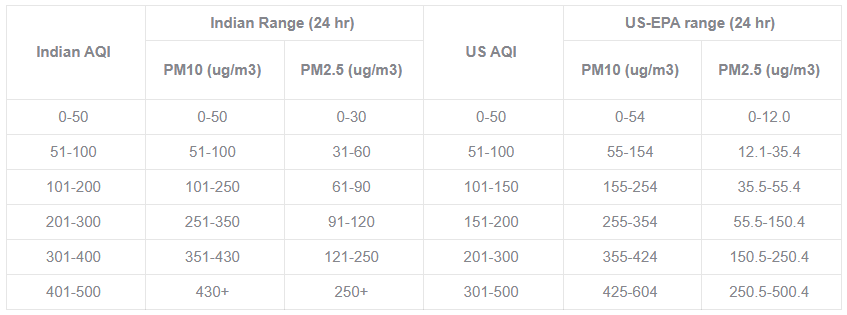

In [4]:
# code here pm10_subindex

def pm10_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + ( x - 50) * 50 / 50
    elif x <= 250:
        return 100 + ( x - 100 ) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250 ) * 100 / 100
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + ( x - 430) * 100 / 80
    else:
        return 0
    
df["pm10_subindex"] = df["pm10"].map(pm10_subindex)

df.loc[::19].head(5)

,co,no2,so2,o3,pm25,pm10,temp,hum,time,pm25_subindex,pm10_subindex
0,14.60,0,0,0.52,42,45,-0.12,97.99,2022-11-26 15:18:00,70.000000,45.0
19,14.50,0,0,0.49,37,38,-0.03,98.12,2022-11-26 15:17:22,61.666667,38.0
38,14.39,0,0,0.48,39,46,-0.07,98.14,2022-11-26 15:16:42,65.000000,46.0
57,14.89,0,0,0.50,39,46,-0.19,97.98,2022-11-26 15:16:04,65.000000,46.0
76,15.60,0,0,0.58,22,27,-0.26,97.70,2022-11-26 15:15:24,36.666667,27.0


### CO

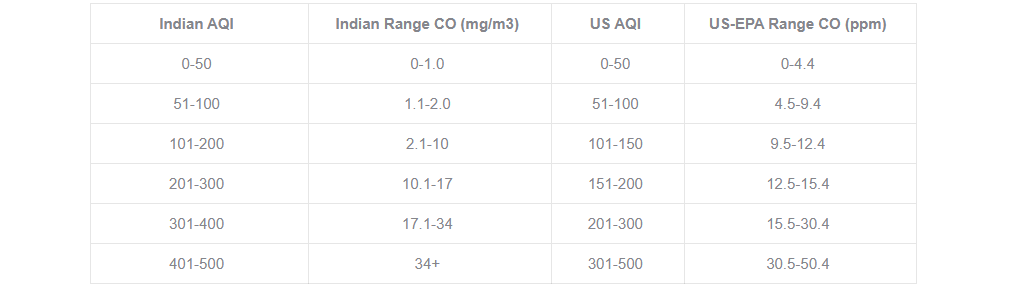

In [22]:
# code here co_subindex

def co_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + ( x - 1) * 50 / 1
    elif x <= 10:
        return 100 + ( x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return  300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + ( x - 34) * 100 / 17
    else:
        return 0
    
df["co_subindex"] = df["co"].map(co_subindex)

df.loc[::19].head(5)

,co,no2,so2,o3,pm25,pm10,temp,hum,time,pm25_subindex,pm10_subindex,co_subindex,o3_subindex,no2_subindex,so2_subindex,aqi
0,14.60,0,0,0.52,42,45,-0.12,97.99,2022-11-26 15:18:00,70.000000,45.0,265.714286,0.52,0.0,0.0,266.0
19,14.50,0,0,0.49,37,38,-0.03,98.12,2022-11-26 15:17:22,61.666667,38.0,264.285714,0.49,0.0,0.0,264.0
38,14.39,0,0,0.48,39,46,-0.07,98.14,2022-11-26 15:16:42,65.000000,46.0,262.714286,0.48,0.0,0.0,263.0
57,14.89,0,0,0.50,39,46,-0.19,97.98,2022-11-26 15:16:04,65.000000,46.0,269.857143,0.50,0.0,0.0,270.0
76,15.60,0,0,0.58,22,27,-0.26,97.70,2022-11-26 15:15:24,36.666667,27.0,280.000000,0.58,0.0,0.0,280.0


### O3

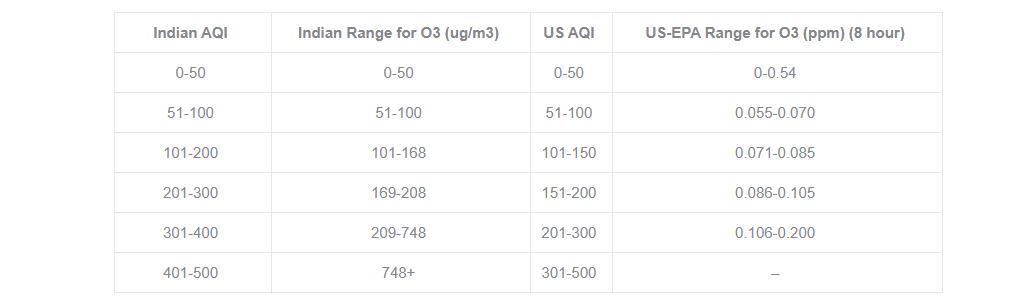

In [10]:
# code here o3_subindex
def o3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + ( x - 50) * 50 / 50
    elif x <= 168:
        return 100 + ( x - 100 ) * 100 / 68
    elif x <= 208:
        return 200 + (x - 169 ) * 100 / 40
    elif x <= 748:
        return  300 + (x - 209) * 100 / 540
    elif x > 748:
        return 400 + ( x - 748) * 100 / 540
    else:
        return 0
    
df["o3_subindex"] = df["o3"].map(o3_subindex)

df.loc[::19].head(5)


,co,no2,so2,o3,pm25,pm10,temp,hum,time,pm25_subindex,pm10_subindex,co_subindex,o3_subindex
0,14.60,0,0,0.52,42,45,-0.12,97.99,2022-11-26 15:18:00,70.000000,45.0,265.217391,0.52
19,14.50,0,0,0.49,37,38,-0.03,98.12,2022-11-26 15:17:22,61.666667,38.0,263.768116,0.49
38,14.39,0,0,0.48,39,46,-0.07,98.14,2022-11-26 15:16:42,65.000000,46.0,262.173913,0.48
57,14.89,0,0,0.50,39,46,-0.19,97.98,2022-11-26 15:16:04,65.000000,46.0,269.420290,0.50
76,15.60,0,0,0.58,22,27,-0.26,97.70,2022-11-26 15:15:24,36.666667,27.0,279.710145,0.58


### NO2

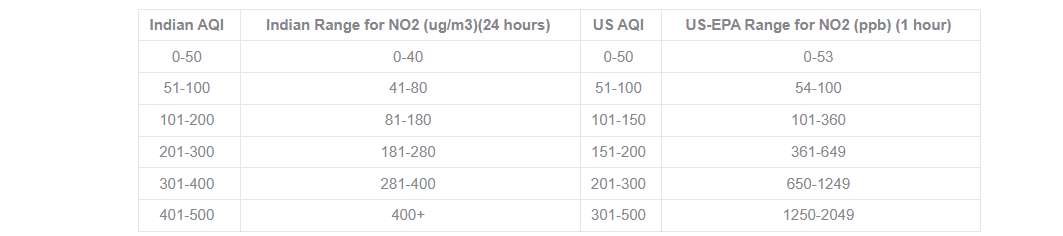

In [15]:
# code here no2_subindex
def NO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + ( x - 41) * 50 / 40
    elif x <= 180:
        return 100 + ( x - 81 ) * 100 / 100
    elif x <= 280:
        return 200 + (x - 181 ) * 100 / 100
    elif x <= 400:
        return  300 + (x - 281) * 100 / 120
    elif x > 400:
        return 400 + ( x - 400) * 100 / 120
    else:
        return 0
    
df["no2_subindex"] = df["no2"].map(NO2_subindex)

df.loc[::19].head(5)

,co,no2,so2,o3,pm25,pm10,temp,hum,time,pm25_subindex,pm10_subindex,co_subindex,o3_subindex,no2_subindex,so2_subindex,aqi
0,14.60,0,0,0.52,42,45,-0.12,97.99,2022-11-26 15:18:00,70.000000,45.0,265.217391,0.52,0.0,0.0,265.0
19,14.50,0,0,0.49,37,38,-0.03,98.12,2022-11-26 15:17:22,61.666667,38.0,263.768116,0.49,0.0,0.0,264.0
38,14.39,0,0,0.48,39,46,-0.07,98.14,2022-11-26 15:16:42,65.000000,46.0,262.173913,0.48,0.0,0.0,262.0
57,14.89,0,0,0.50,39,46,-0.19,97.98,2022-11-26 15:16:04,65.000000,46.0,269.420290,0.50,0.0,0.0,269.0
76,15.60,0,0,0.58,22,27,-0.26,97.70,2022-11-26 15:15:24,36.666667,27.0,279.710145,0.58,0.0,0.0,280.0


### SO2

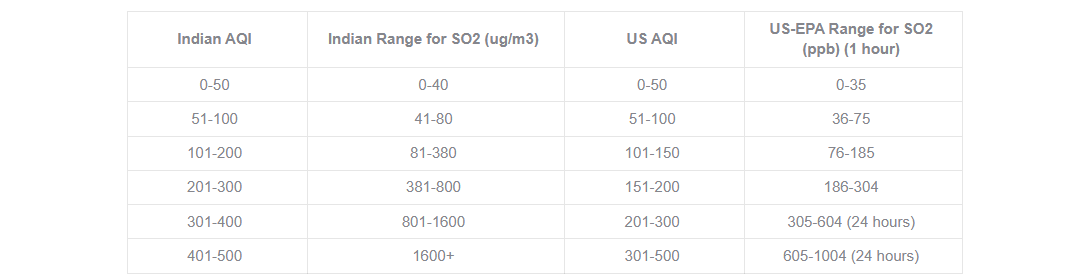

In [25]:
# code here so2_subindex
def so2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + ( x - 41) * 50 / 40
    elif x <= 380:
        return 100 + ( x - 81 ) * 100 / 300
    elif x <= 800:
        return 200 + (x - 381 ) * 100 / 420
    elif x <= 1600:
        return  300 + (x - 801) * 100 / 800
    elif x > 1600:
        return 400 + ( x - 1600) * 100 / 800
    else:
        return 0
    
df["so2_subindex"] = df["so2"].map(so2_subindex)

df.loc[::19].head(5)

,co,no2,so2,o3,pm25,pm10,temp,hum,time,pm25_subindex,pm10_subindex,co_subindex,o3_subindex,no2_subindex,so2_subindex,aqi
0,14.60,0,0,0.52,42,45,-0.12,97.99,2022-11-26 15:18:00,70.000000,45.0,265.714286,0.52,0.0,0.0,266.0
19,14.50,0,0,0.49,37,38,-0.03,98.12,2022-11-26 15:17:22,61.666667,38.0,264.285714,0.49,0.0,0.0,264.0
38,14.39,0,0,0.48,39,46,-0.07,98.14,2022-11-26 15:16:42,65.000000,46.0,262.714286,0.48,0.0,0.0,263.0
57,14.89,0,0,0.50,39,46,-0.19,97.98,2022-11-26 15:16:04,65.000000,46.0,269.857143,0.50,0.0,0.0,270.0
76,15.60,0,0,0.58,22,27,-0.26,97.70,2022-11-26 15:15:24,36.666667,27.0,280.000000,0.58,0.0,0.0,280.0


### Расчет AQI

In [26]:
df["aqi"] = round(df[["pm25_subindex", 
                      "pm10_subindex", 
                      "co_subindex", 
                      "o3_subindex", 
                      "no2_subindex", 
                      "so2_subindex"]].max(axis = 1))

df.head(3)

,co,no2,so2,o3,pm25,pm10,temp,hum,time,pm25_subindex,pm10_subindex,co_subindex,o3_subindex,no2_subindex,so2_subindex,aqi
0,14.6,0,0,0.52,42,45,-0.12,97.99,2022-11-26 15:18:00,70.0,45.0,265.714286,0.52,0.0,0.0,266.0
1,14.6,0,0,0.52,42,45,-0.13,98.01,2022-11-26 15:17:58,70.0,45.0,265.714286,0.52,0.0,0.0,266.0
2,14.6,0,0,0.51,42,45,-0.14,98.01,2022-11-26 15:17:56,70.0,45.0,265.714286,0.51,0.0,0.0,266.0
